In [18]:
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.imagenet_utils import preprocess_input

# Load the CSV file containing filenames and labels
df = pd.read_csv('/content/drive/MyDrive/CNN/Dog Emotion/labels.csv')

# Extract unique labels from the DataFrame
unique_labels = df['label'].unique()

# Count the number of unique labels to determine the number of classes
num_classes = len(unique_labels)

# Split the data into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Define image dimensions and other parameters
image_height = 224
image_width = 224
batch_size = 32
num_epochs = 10  # Adjust as needed

# Create image data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Specify the base directory where the images are located
base_dir = '/content/drive/MyDrive/CNN/Dog Emotion'

# Create training and testing generators
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=base_dir,
    x_col="filename",
    y_col="label",
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=base_dir,
    x_col="filename",
    y_col="label",
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')  # Output layer with softmax activation for multi-class classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, epochs=num_epochs, validation_data=test_generator)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)

print("Test Accuracy:", test_accuracy)

Found 3200 validated image filenames belonging to 4 classes.
Found 800 validated image filenames belonging to 4 classes.
Epoch 1/10
100/100 [==============================] - 439s 4s/step - loss: 1.3840 - accuracy: 0.2869 - val_loss: 1.3468 - val_accuracy: 0.3200
Epoch 2/10
100/100 [==============================] - 436s 4s/step - loss: 1.3061 - accuracy: 0.3519 - val_loss: 1.2730 - val_accuracy: 0.3487
Epoch 3/10
100/100 [==============================] - 437s 4s/step - loss: 1.2723 - accuracy: 0.3881 - val_loss: 1.2666 - val_accuracy: 0.3950
Epoch 4/10
100/100 [==============================] - 431s 4s/step - loss: 1.2333 - accuracy: 0.4028 - val_loss: 1.2362 - val_accuracy: 0.4075
Epoch 5/10
100/100 [==============================] - 436s 4s/step - loss: 1.2089 - accuracy: 0.4306 - val_loss: 1.1903 - val_accuracy: 0.4162
Epoch 6/10
100/100 [==============================] - 419s 4s/step - loss: 1.1812 - accuracy: 0.4541 - val_loss: 1.1883 - val_accuracy: 0.4412
Epoch 7/10
100/100 [=

1/1 [==============================] - 0s 119ms/step


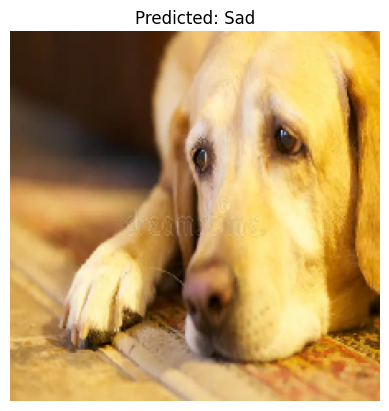

Predicted class: Sad


In [19]:
from keras.preprocessing import image
# Load and preprocess the new image
img = image.load_img('/content/drive/MyDrive/CNN/sad.png', target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.  # Normalize pixel values

# Make predictions
predictions = model.predict(img_array)

# Interpret results
predicted_class_index = np.argmax(predictions)
class_labels =  ['Angry', 'Happy', 'Sad', 'Relaxed']  # Replace with your class labels
predicted_label = class_labels[predicted_class_index]
plt.imshow(img)
plt.axis('off')
plt.title('Predicted: ' + predicted_label)
plt.show()
print("Predicted class:", predicted_label)


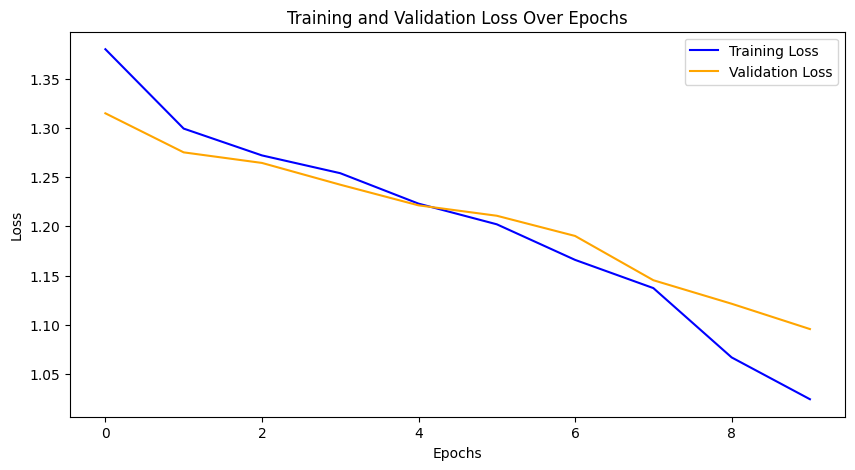

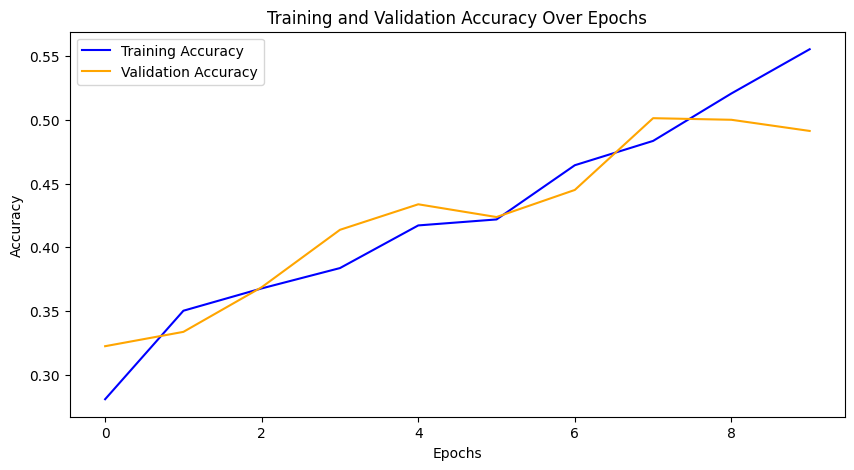

In [ ]:
import matplotlib.pyplot as plt
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Get training and validation accuracy
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='orange')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(train_acc, label='Training Accuracy', color='blue')
plt.plot(val_acc, label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()